### Business Problem Understanding

* Identify relationship between expenses and all the other factors.
* Determine the expenses for the following data-

In [1]:
'''
age	sex	    bmi	children smoker	 region	    expenses
22	female	26.2	0	 yes	southwest	
65	male	31.7	2	 no	    southeast
'''

'\nage\tsex\t    bmi\tchildren smoker\t region\t    expenses\n22\tfemale\t26.2\t0\t yes\tsouthwest\t\n65\tmale\t31.7\t2\t no\t    southeast\n'

### Data Understanding

* This sample data displays insurance premium amounts for various consumer categories described by various factors such as age, sex, bmi, no. of children, smoking habits and region.

**Independent Variables**

* Age
* Sex
* BMI
* Children
* Smoker
* Region

**Dependent Variables**

* Expenses

### Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings                    
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.duplicated().sum()

1

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
continuous= ['age', 'bmi', 'expenses']

count= ['children']

categorical= ['sex', 'smoker', 'region']

In [8]:
df[continuous].describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [9]:
df[count].describe()

,children
count,1338.000000
mean,1.094918
std,1.205493
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [10]:
df[categorical].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


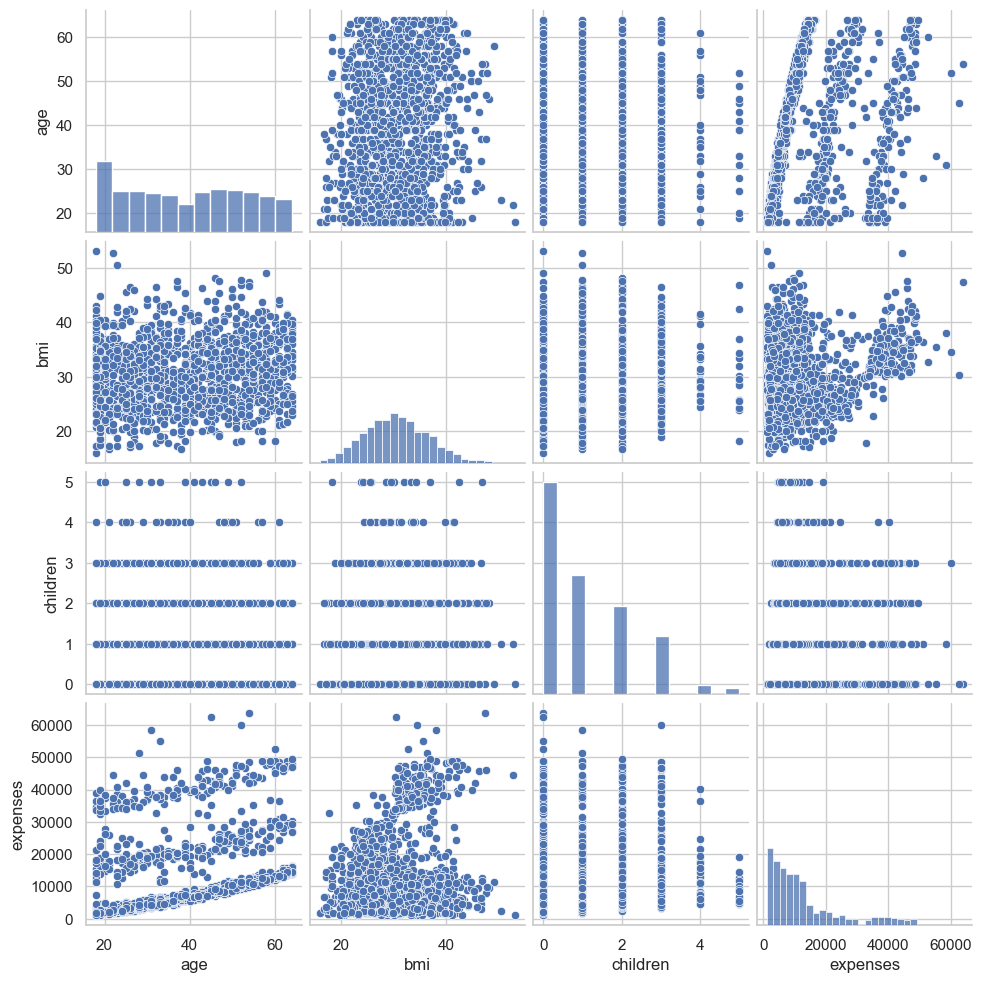

In [11]:
sns.pairplot(df)
plt.show()

### Encoding-

In [12]:

# encoding sex column
df['sex'].replace({'female': 0, 'male': 1}, inplace=True)

# encoding smoker column
df['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)

# encoding region column
df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast':3}, inplace=True)

In [13]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2,10600.55
1334,18,0,31.9,0,0,3,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,0,2007.95


In [14]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,-0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157439,-0.016569,0.002181,1.000000,0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,0.006208,1.000000


**Data Cleaning**

* Since the columns ('sex', 'bmi', 'children', 'region') have low correlation with expenses. We will have to drop the variables.

In [15]:
df=df.drop(['sex', 'bmi', 'children', 'region'], axis=1)
df

,age,smoker,expenses
0,19,1,16884.92
1,18,0,1725.55
2,28,0,4449.46
3,33,0,21984.47
4,32,0,3866.86
...,...,...,...
1333,50,0,10600.55
1334,18,0,2205.98
1335,18,0,1629.83
1336,21,0,2007.95


In [16]:
df.to_excel('insurance_cleaned_data.xlsx' , index=False)